# Resumo do pedido

Você é analista em uma grande loja online. Junto com o departamento de marketing, você compilou uma lista de hipóteses que podem ajudar a aumentar a receita.

Você precisa priorizar essas hipóteses, lançar um teste A/B e analisar os resultados.

# 1.1 Carregando bibliotecas necessárias

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats


# 1.2 Carregando dados fornecidos

In [2]:
hypothesis_data = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders_data = pd.read_csv('/datasets/orders_us.csv')
visits_data = pd.read_csv('/datasets/visits_us.csv')

# 2.1 Pré-processamento dos dados

# 2.2.1 Análises Iniciais (Hipóteses)

Primeiro, vamos checar as informações dos datasets fornecidos: checar os dados presentes, quais são os tipos de dados que temos, checar valores ausentes e duplicatas. 

Após essas checagens, vamos fazer as mudanças necessárias. 

Como temos pedidos diferentes pros datasets, vamos primeiro analisar o dataset de hipóteses. Depois os de pedidos e os de visitantes.

In [3]:
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Todos dados estão agrupados em uma única coluna, mas já separei no carregamento do arquivo.

In [4]:
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Como todas colunas estão em tipo object, vamos modificar todas exceto 'hypothesis' para tipo int.

In [5]:
#hypothesis_data[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = hypothesis_data[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']].astype(str)
#hypothesis_data[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']] = hypothesis_data[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']].apply(lambda x: x.str.lower())
#hypothesis_data[['hypothesis', 'reach', 'impact', 'confidence', 'effort']] = hypothesis_data[['hypothesis', 'reach', 'impact', 'confidence', 'effort']].astype(int)
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Feito isso vimos que não temos nenhum problema com os dados. Agora vou analisar os pedidos e visitantes.

# 2.2.2 Análises Iniciais (Pedidos e Visitas)

In [6]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
print(orders_data.isna().sum())
print(orders_data.duplicated().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
0


In [8]:
orders_data.head(20)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


Resultados da primeira análise:

1) Os nomes das colunas transactionId e visitorId não estão ideais. Vou melhora-las adicionando um "_".

2) Com relação aos tipos de dados das colunas:
   - Date vai ser convertido pra tipo datetime.
    
3) Não encontramos valores ausentes nem duplicatas.

In [9]:
orders_data = orders_data.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [10]:
orders_data['date'] = orders_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [12]:
print(orders_data)

      transaction_id  visitor_id       date  revenue group
0         3667963787  3312258926 2019-08-15     30.4     B
1         2804400009  3642806036 2019-08-15     15.2     B
2         2961555356  4069496402 2019-08-15     10.2     A
3         3797467345  1196621759 2019-08-15    155.1     B
4         2282983706  2322279887 2019-08-15     40.5     B
...              ...         ...        ...      ...   ...
1192      2662137336  3733762160 2019-08-14    100.8     B
1193      2203539145   370388673 2019-08-14     50.1     A
1194      1807773912   573423106 2019-08-14    165.3     A
1195      1947021204  1614305549 2019-08-14      5.5     A
1196      3936777065  2108080724 2019-08-15   3120.1     B

[1197 rows x 5 columns]


Com isso corrigido, vamos checar se algum visitor_id está presente tanto no grupo A como no B.

In [13]:
orders_data.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

A soma desses valores é 1089, o que mostra que temos 108 visitantes não únicos. Porém, isso não indica que eles pertecem aos dois grupos ao mesmo tempo. Um mesmo visitante pode fazer 2 visitas e ainda assim estar alocado no grupo A. Isso não é um problema. Precisamos encontrar os visitantes que possuem um primeiro acesso no grupo A e um segundo acesso no grupo B.

Vamos dividir esses visitantes baseado na data de primeiro acesso, e excluir os acessos seguintes que ele se encontra em outro grupo.

In [14]:
duplicated_visitor_ids = orders_data[orders_data.duplicated(subset='visitor_id', keep=False)]
group_counts = duplicated_visitor_ids.groupby('visitor_id')['group'].nunique()
conflicting_visitors = group_counts[group_counts > 1].index.tolist()
len(conflicting_visitors)

58

Então temos 58 visitantes que foram alocados em dois grupos diferentes, dos 108 que tinhamos originalmente. Então esses 50 que visitaram em datas diferentes possuem o mesmo grupo.

Aqui eu tive que tomar uma decisão sobre o que fazer com esses visitantes que possuíam grupos diferentes dependendo da compra.

As opções eram: 

    1) remover todas linhas com transações com grupos diferentes do primeiro grupo: utilizando esse método vou perder muitos dados, o que pode enviesar muito meu resultado
    2) substituir os visitantes pertencentes à grupos diferentes do grupo de primeiro acesso: nesse caso eu vou chegar quais foram os primeiros acessos dos visitantes e setar ele como o parâmetro. Depois vou passar todos acessos subsequentes daquele visitante para o mesmo grupo do primeiro acesso.
    3) substituir os grupos dos visitante se baseando na maior compra: se o parâmetro utilizado pra definir os grupos foi a o valor da compra, então eu poderia fazer um filtro que padroniza baseado na compra. Porém eu não tenho nenhuma informação sobre isso.
    
O método 2 provavelmente vai gerar algumas anomalias na minha análise, enquanto o método 3 manteria uma melhor clareza dos resultados. No entanto, vou optar pelo método 2, pois não tenho garantia do método de divisão entre os grupos.

Lidarei com valores atípicos mais adiante, caso eles aconteçam.

In [15]:
for visitor_id in conflicting_visitors:
    original_group = orders_data.loc[orders_data['visitor_id'] == visitor_id, 'group'].iloc[0]
    orders_data.loc[orders_data['visitor_id'] == visitor_id, 'group'] = original_group

print(orders_data['group'].value_counts())

B    639
A    558
Name: group, dtype: int64


Com tudo isso feito, fiz a substitução dos grupos dos visitantes que foram alocados em outro grupo diferente do primeiro de quando eles entraram. Os visitantes repetidos que se mantiveram são porque eles pertencem ao mesmo grupo em todos os seus acessos.

In [16]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visits_data.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [18]:
visits_data.duplicated().sum()

0

In [19]:
visits_data.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Resultados da primeira análise:

1) Sem mudanças necessárias nas colunas.

2) Com relação aos tipos de dados das colunas:
   - Date vai ser convertido pra tipo datetime.
    
3) Não encontramos valores ausentes nem duplicatas.

In [20]:
visits_data['date'] = visits_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
visits_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [22]:
visits_data

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [23]:
visits_pivot = visits_data.pivot_table(index = 'date', columns = 'group', values = 'visits', aggfunc = 'sum')
visits_pivot

group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707
2019-08-06,667,655
2019-08-07,644,709
2019-08-08,610,654
2019-08-09,617,610


Não é necessário realizar nenhuma outra correção em visits_data.

# 3.1 Priorizando hipóteses

Temos 9 hipóteses para checar quais são as prioritárias. Vamos analisá-las baseando nos métodos ICE e RICE.

Primeiro, farei o método ICE

# 3.1.1 Métodos ICE e RICE

In [24]:
hypothesis_data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [25]:
hypothesis_data['ICE'] = (hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']
print(hypothesis_data[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [26]:
hypothesis_data['RICE'] = (hypothesis_data['Reach'] * hypothesis_data['Impact'] * hypothesis_data['Confidence']) / hypothesis_data['Effort']
print(hypothesis_data[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


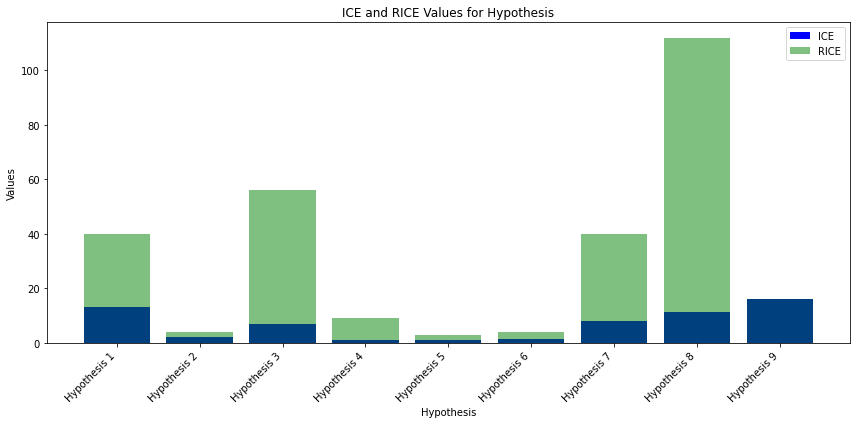

In [27]:
plt.figure(figsize=(12, 6))

plt.bar(['Hypothesis {}'.format(i + 1) for i in range(len(hypothesis_data))], hypothesis_data['ICE'], color='blue', label='ICE')
plt.bar(['Hypothesis {}'.format(i + 1) for i in range(len(hypothesis_data))], hypothesis_data['RICE'], color='green', alpha=0.5, label='RICE')

plt.xlabel('Hypothesis')
plt.ylabel('Values')
plt.title('ICE and RICE Values for Hypothesis')
plt.xticks(rotation=45, ha='right') 
plt.legend() 
plt.tight_layout() 
plt.show()


Com o gráfico podemos visualizar melhor as diferenças de e ICE e RICE e encontrar exatamente os pontos que apresentam diferenças entre as duas análises.

    1) Todos os valores de RICE são maiores do que ICE: isso faz sentido, pois ao fazer a multiplicação por mais um valor (reach) é plausível que a prioridade aumente. No entanto, na hipótese 9 só vemos o valor de ICE. Isso acontece pois ICE e RICE possuem o mesmo valor. É possível ver que reach apresenta valor 1 na hipótese 9, então o valor de ICE e RICE obviamente vai ser o mesmo.
    
    2) Inclusive, a hipótese 9 é a que apresenta o maior ICE dentre todas. Então quando não é levado em consideração o alcance, é a hipótese que apresenta o melhor resultado em questão de prioridade. Porém, como o alcance dela é mínimo, não existem muitas vantagens quando feita a análise no método RICE.
    
    3) As hipóteses com as menores prioridades são as mesmas para ICE e para RICE: as hipóteses 2, 4, 5 e 6 são as últimas em prioridade independente do tipo de análise. Isso acontece devido ao alto esforço para implementação da hipótese para as opções 2 e 4, e aos baixo impacto, alcance e confidência para 5 e 6. Então, utilizando esses parâmetros, essas hipóteses não possuem uma prioridade alta.
    
    4) As hipóteses 1, 3, 7 e 8 são as que possuem o maior alcance: isso explica o valor elevado de RICE para essas hipóteses. A hipótese 1 é a que apresenta os melhores valores de impacto e confiança, e mesmo com um alcance baixo, ainda assim consegue alcançar um alto valor de prioridade. Enquanto isso, as hipóteses 3, 7 e 8 possuem valores altos de alcance, que compensam os baixos valores de impacto e confiança. Inclusive, o alcance da hipótese 8 é tão grande (10) que no método RICE atingiu o maior valor por muito (o dobro da segunda maior prioridade). 
    
    5) Pelo método ICE, priorizariamos a hipótese 9, enquanto pelo método RICE priorizariamos a hipótese 8 e depois a 3.
    

# 4.1 Teste A/B

Vou agora realizar o passo a passo do teste A/B, explicando e fazendo conclusões a cada passo.

# 4.1.1 Gráficos de receita

Primeiro vou fazer um gráfico de receita acumulada por grupo.

In [28]:
dates_groups = orders_data[['date','group']].drop_duplicates()
orders_aggregated = dates_groups.apply(
                   lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == x['group'])].agg(
                   {'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}
                   ), axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups.apply(
                     lambda x: visits_data[np.logical_and(visits_data['date'] <= x['date'], visits_data['group'] == x['group'])].agg(
                     {'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulative_data) 

         date group  orders  buyers  revenue  visits
0  2019-08-01     A      23      19   2266.6     719
1  2019-08-01     B      22      21   1710.2     713
2  2019-08-02     A      43      37   3790.6    1338
3  2019-08-02     B      46      43   4313.5    1294
4  2019-08-03     A      67      61   5605.8    1845
..        ...   ...     ...     ...      ...     ...
57 2019-08-29     B     595     517  84860.7   17708
58 2019-08-30     A     549     467  66152.3   18037
59 2019-08-30     B     616     538  88147.5   18198
60 2019-08-31     A     558     475  67241.1   18736
61 2019-08-31     B     639     556  90154.4   18916

[62 rows x 6 columns]


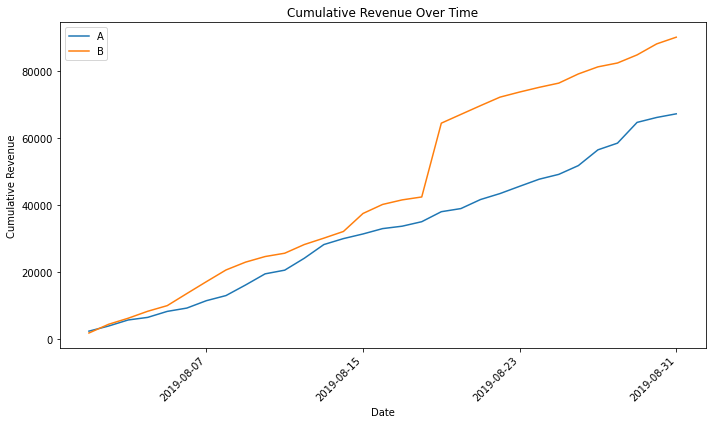

In [29]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 6))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=8))
plt.legend() 
plt.tight_layout()



A receita está apresentando um crescimento estável ao longo do tempo para os dois grupos.

No grupo A não existe nenhum pico de compra muito discrepante, o que mostra que não teve uma compra muito grande em um único dia. No entanto no grupo B isso acontece, pois existe um salto alto de venda acumulada em um certo período, mostrando que naquele ponto ocorreu uma alta receita. Isso pode ter acontecido por uma alta quantidade de pedidos ou por alguns pedidos muitos caros.

# 4.1.2 Tamanho médio acumulado dos pedidos por grupo

Para construir o volume médio de compra por grupo eu vou dividir a receita cumulativa pela quantidade cumulativa de pedidos.

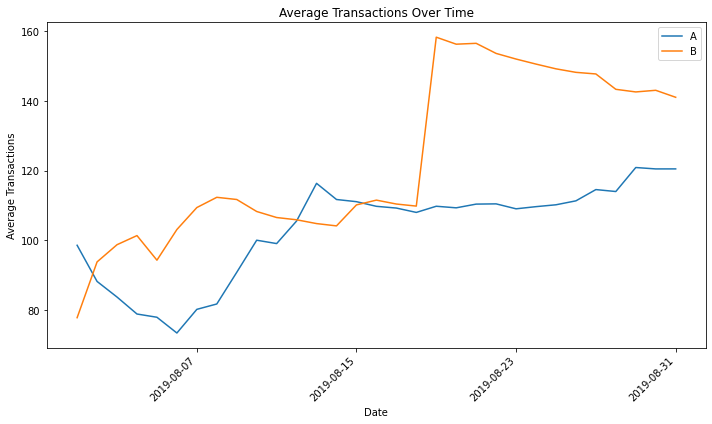

In [30]:
plt.figure(figsize=(10, 6))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.xlabel('Date')
plt.ylabel('Average Transactions')
plt.title('Average Transactions Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=8))
plt.legend() 
plt.tight_layout()


O tamanho médio acumulado dos grupos oscila bastante no começo do teste, mas se estabiliza a partir da segunda semana. Para o grupo B, ocorre um pico no aumento dos pedidos no mesmo período que acontece na receita acumulada, mostrando que tem algo de estranho naquele período.

# 4.1.3 Diferença relativa no tamanho médio acumulado do pedido para os grupos

Agora farei um gráfico de diferença relativa, que representa a variação percentual entre os dois grupos.

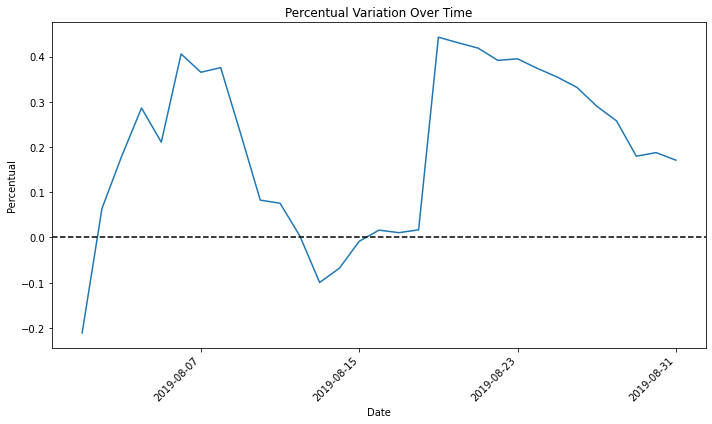

In [31]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Date')
plt.ylabel('Percentual')
plt.title('Percentual Variation Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=8))
plt.tight_layout()


A variação percentual da receita ao longo do tempo oscila com alguns picos, indicando as variações de alterações percentuais atípicos ao longo do período. Podemos detectar uma nova variação na primeira semana, e a ja vista antes variação na segunda/terceira semana.

# 4.1.4 Taxa de conversão de cada grupo e diferença relativa das taxas

A taxa de conversão de cada grupo mostra a conversão diária de visitantes que realizam a transação. Podemos a partir dai encontrar a diferença entre as taxas de conversões dos dois grupos.

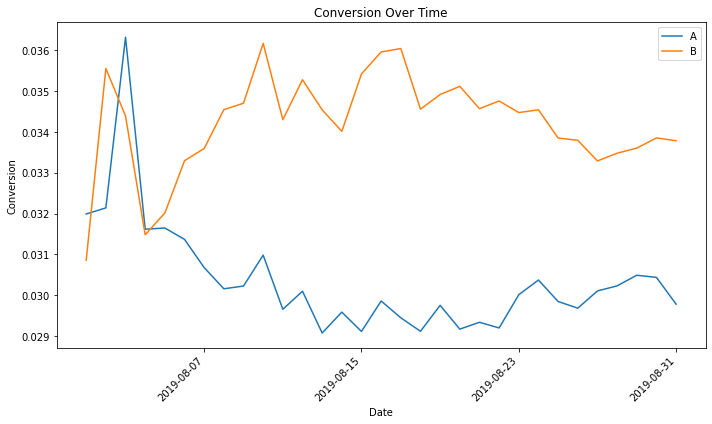

In [32]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visits']
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']


plt.figure(figsize=(10, 6))

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

plt.xlabel('Date')
plt.ylabel('Conversion')
plt.title('Conversion Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=8))
plt.tight_layout()
plt.legend()

No início da análise ambos grupos mostraram um pico na conversão antes de cair ao valor base. Após isso a taxa de conversão do grupo A caiu radicalmente, enquanto a do grupo B aumentou e se manteve, apesar das oscilações, a uma certa taxa constante. Apesar disso, nenhum dos dois grupos parecem estar apresentando uma estabilidade.

Visualizando agora o gráfico de diferença relativa na taxa de conversão:

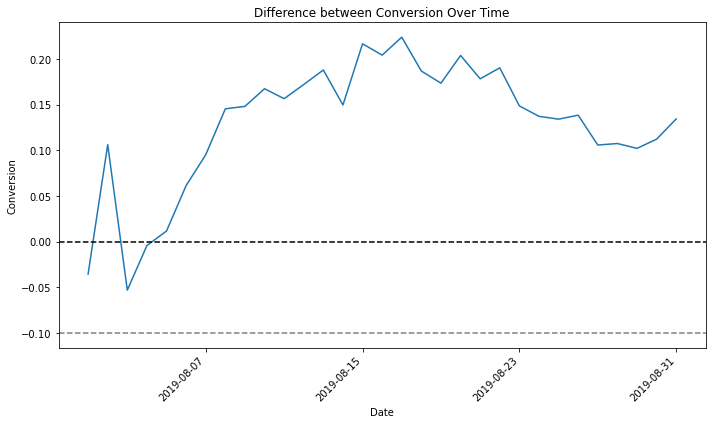

In [33]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(
                                cumulative_data_B[['date','conversion']],
                                                    left_on='date', 
                                                    right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Conversion')
plt.title('Difference between Conversion Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=8))
plt.tight_layout()


O gráfico de diferença relativa entre os grupos B e A mostra que o grupo B possui uma diferença positiva em relação ao grupo A, o que indica que a taxa de conversão dele é positiva e superior ao outro grupo. 

No entanto, não podemos indicar uma estabilidade com base nessa taxa, pois ao fim do experimento o grupo não apresentou sinais de estabilidade.

# 4.1.5 Calculos de percentis 95 e 99 para o número de pedidos por usuário

Como dito anteriormente, a presença de valores atípicos/extremos é esperada. Vou utilizar os percentis pra encontrar o ponto em que um valor se torna um valor extremo.

In [34]:
print(np.percentile(orders_data['revenue'], [90, 95, 99])) 


[282.48  435.54  900.904]


Menos que 5% dos pedidos custou mais do que 435, e menos de 1% custou mais do que 900.
Como sabemos que usuários que fizeram mais de um pedido estão modificando resultado dos percentis, vou encontrar quantos pedidos foram feitos por usuários.

In [35]:
orders_users = (orders_data.drop(['group', 'revenue', 'date'], axis=1)
                .groupby('visitor_id', as_index=False)
                .agg({'transaction_id': pd.Series.nunique}))

orders_users.columns = ['visitor_id', 'orders']

print(orders_users.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Existem usuários com 11 pedidos ao mesmo tempo que existem usuários com muito menos pedidos ao longo do mês.
Visualizando em um gráfico:

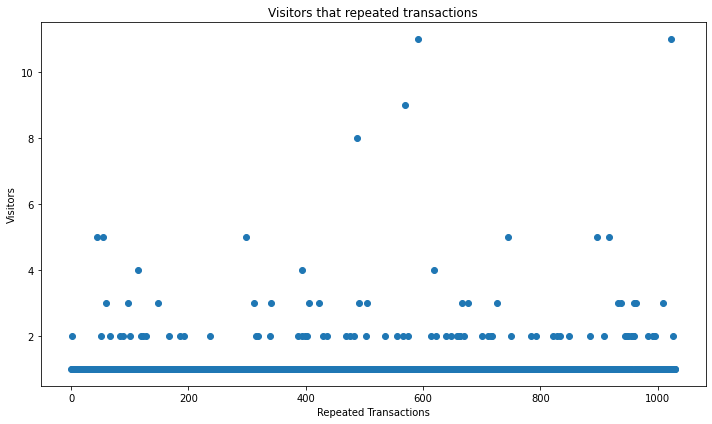

In [36]:
plt.figure(figsize=(10, 6))

x_values = pd.Series(range(0,len(orders_users)))

plt.scatter(x_values, orders_users['orders']) 
plt.xlabel('Repeated Transactions')
plt.ylabel('Visitors')
plt.title('Visitors that repeated transactions')
plt.tight_layout()


A imensa maioria dos pedidos foi feito apenas uma vez por cliente. embora existam clientes que fizeram mais de um pedido, não são a grande parte.

Vou agora encontrar os percentis para a quantidade de pedidos por usuários.

In [37]:
print(np.percentile(orders_users['orders'], [90, 95, 99])) 


[1. 2. 4.]


10% dos usuários fizeram mais do que 1 pedido, 5% fez mais do que 2 pedidos e 1% fez mais de 4 pedidos.

Desse modo, vamos considerar as anomalias como sendo mais do que 2 pedidos (pelo menos 3).

Vou checar agora quais são os valores extremos que temos nos valores dos pedidos.

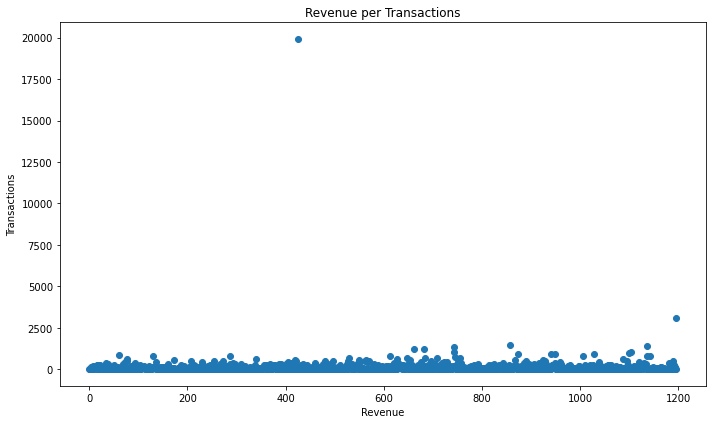

In [38]:
plt.figure(figsize=(10, 6))

x_values = pd.Series(range(0, len(orders_data['revenue'])))

plt.scatter(x_values, orders_data['revenue']) 
plt.xlabel('Revenue')
plt.ylabel('Transactions')
plt.title('Revenue per Transactions')
plt.tight_layout()


Claramente temos 2 pontos muito isolados que são extremamente fora do normal. Além desses, temos alguns outros poucos que se destacam. 

Podemos checar os percentis dos pedidos usando o mesmo método:

In [39]:
print(np.percentile(orders_data['revenue'], [90, 95, 99])) 


[282.48  435.54  900.904]


Menos que 5% dos pedidos custou mais do que 435, e menos de 1% custou mais do que 900.
Como sabemos, usuários que fizeram mais de um pedido estão modificando resultado dos percentis. Desse modo, vamos admitir que valores acima de 435 (5%) são considerados valores extremos.

# 4.1.6 Significância estatística da diferença na conversão (dados brutos)

Vou calcular agora a significância estatística, que vai mostrar se a diferença nas taxas de conversão é grande o suficiente para não ser aleatória.

Vamos testar as hipóteses que: 

    - H0: as distribuições das duas amostras são iguais
    - H1: as distribuições das duas amostras não são iguais

In [40]:
orders_users_A = orders_data[orders_data['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_A.columns = ['visitor_id', 'orders']

orders_users_B = orders_data[orders_data['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_users_B.columns = ['visitor_id', 'orders']

sample_A = pd.concat([orders_users_A['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(orders_users_A['orders'])), name='orders')],axis=0)
sample_B = pd.concat([orders_users_B['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(orders_users_B['orders'])), name='orders')],axis=0) 

print("{0:.5f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print("{0:.3f}".format(sample_B.mean()/sample_A.mean()-1)) 


0.01666
0.134


Comparei as duas amostras utilizand o teste de Mann-Whitney, e encontrei o p-valor de 0.0166. Esse valor mostra que existem evidências estatísticas que nos permitem rejeitar H0, ou seja, podemos rejeitar a hipótese que as duas amostras são iguais.

Enquanto isso, a diferença percentual das médias foi de 0.134, ou seja, 13.4%. Isso mostra que a média de conversão do grupo B é 13.4% maior do que a média do grupo A.

# 4.1.7 Significância estatística da diferença no tamanho médio dos pedidos (dados brutos)

Utilizando a mesma metodologia podemos encontrar a significância estatística da diferença no tamanho médio dos pedidos:

Vamos testar as hipóteses que: 

    - H0: as distribuições das duas amostras são iguais
    - H1: as distribuições das duas amostras não são iguais

In [41]:
print('{0:.5f}'.format(stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], orders_data[orders_data['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1)) 


0.67256
0.171


Nesse caso, o p-valor é significativamente maior, o que mostra que não podemos rejeitar a hipótese que as distribuição são iguais.

Enquanto isso, encontramos que a média de receita no grupo B é 17.1% maior do que a m´dia da receita no grupo A.

# 4.1.8 Significância estatística da diferença na conversão (dados filtrados)

Agora vou realizar os mesmos testes estatísticos, mas realizando a filtragem dos dados atípicos/extremos. Eu selecionei quais são esses valores anteriormente: para os pedidos são mais do que 2 pedidos, e para a receita é maior do que 435.

In [42]:
extreme_users_orders = pd.concat([orders_users_A[orders_users_A['orders'] > 2]['visitor_id'], orders_users_B[orders_users_B['orders'] > 2]['visitor_id']], axis = 0)
extreme_users_revenue = orders_data[orders_data['revenue'] > 435]['visitor_id']
extreme_users = pd.concat([extreme_users_orders, extreme_users_revenue], axis = 0).drop_duplicates().sort_values()
print(extreme_users.head(5))
print(extreme_users.shape) 

1099    148427295
17      199603092
928     204675465
34      237748145
36      249864742
Name: visitor_id, dtype: int64
(84,)


Temos 84 usuários que apresentam comportamento anômalo. Vou filtra-los:

In [43]:
sample_A_filtered = pd.concat(
    [orders_users_A[np.logical_not(
        orders_users_A['visitor_id'].isin(extreme_users))][
        'orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(orders_users_A['orders'])),name='orders')],axis=0)
sample_B_filtered = pd.concat([orders_users_B[np.logical_not(orders_users_B['visitor_id'].isin(extreme_users))]['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(orders_users_B['orders'])),name='orders')],axis=0)

Novamente vou testar as mesmas hipóteses:

    - H0: as distribuições das duas amostras são iguais
    - H1: as distribuições das duas amostras não são iguais



In [44]:
print("{0:.5f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

0.01428
0.164


O p-valor nesse caso é menor ainda do que no teste anterior, sem realizar a filtragem. Isso indica ainda mais que a hipótese nula pode ser rejeitada, mostrando que a remoção dos usuários extremos impactou a significância do teste. 

Já em relação ao percentual da estatistica de conversão, obtivemos 16.4%  que também é maior em comparação aos 13.4% anteriores.

# 4.1.9 Significância estatística da diferença na tamanho médio dos pedidos  (dados filtrados)

Utilizando a mesma metodologia podemos encontrar a significância estatística da diferença no tamanho médio dos pedidos para os valores filtrados:

Vamos testar as hipóteses que: 

    - H0: as distribuições das duas amostras são iguais
    - H1: as distribuições das duas amostras não são iguais

In [45]:
print('{0:.5f}'.format(stats.mannwhitneyu(orders_data[np.logical_and(orders_data['group']=='A',
        np.logical_not(orders_data['visitor_id'].isin(extreme_users)))]['revenue'],
        orders_data[np.logical_and(orders_data['group']=='B',
        np.logical_not(orders_data['visitor_id'].isin(extreme_users)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_data[np.logical_and(orders_data['group']=='B',np.logical_not(orders_data['visitor_id'].isin(extreme_users)))]['revenue'].mean()/
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitor_id'].isin(extreme_users)))]['revenue'].mean() - 1)) 

0.68503
-0.047


O p-valor nesse caso não nos permite rejeitar a hipótese nula, o que mostra que não podemos rejeitar a hipótese de que as distribuições das duas amostras são iguais.

E com relação a diferença percentual da media de -0.047, ela não possui significância estatística por ser uma variação percentual muito pequena.

# 4.2 Tomada de decisão

Por fim, preciso tomar uma decisão sobre interromper o Teste A/B e mostrar qual grupo apresentou uma melhor performance, parar o teste e concluir que não há diferença entre os grupos, ou continuar o teste.

Para a análise de Conversão (antes e depois da filtragem dos dados) podemos garantir que existe uma diferença significativa do grupo B em relação ao grupo A. O grupo B apresentou uma maior taxa de conversão e de receita ao longo do tempo, e tudo indica que é o grupo líder e que apresenta um melhor resultado.

No entanto, não consegui rejeitar a hipótese que as distribuições são iguais na análise da receitasignificância estatística com relação à receita, tanto para os dados brutos como para os dados filtrados.

No entanto, mesmo assim minha decisão final é de interromper o teste e declarar o grupo B como mais vantajoso. Foi o grupo superior em todas análises e mesmo não garantindo a hipótese no teste com relação à receita, ele apresenta um melhor resultado.

# 5.1 Conclusões

Com relação aos testes de hipóteses, verificamos quais eram os testes que, de acordo com os parâmetros indicados, apresentavam maior nível de prioridade. 

    - Com o método ICE, verifiquei que a hipótese que deve ser priorizada é a hipótese 9.
    - Com o método RICE, verifiquei que a hipótese que deve ser priorizada é primeiro a 8, e depois a 3
    
Sobre o Teste A/B, a decisão que eu tomei foi de interromper o teste A/B decretando que o grupo B trouxe mais retornos positivos. Devemos investigar o motivo de não conseguirmos rejeitar a hipótese nula, mas não existe motivo evidente para continuar fazendo os testes, devido ao gasto de manter o mesmo. Acredito que com os resultados atuais já é possível cravar a eficácia do grupo B.